In [1]:
import numpy as np
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data[:, 0:1]   # Feature: sepal length
y = iris.data[:, 2:3]   # Target: petal length

# Shuffle indices
m = X.shape[0]
indices = np.arange(m)
np.random.seed(42)
np.random.shuffle(indices)

# 70-30 split
train_size = int(0.7 * m)
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


In [3]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [4]:
theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
print("Theta:", theta_best)

Theta: [[-7.43867614]
 [ 1.91139488]]


In [5]:
y_test_pred = X_test_b @ theta_best

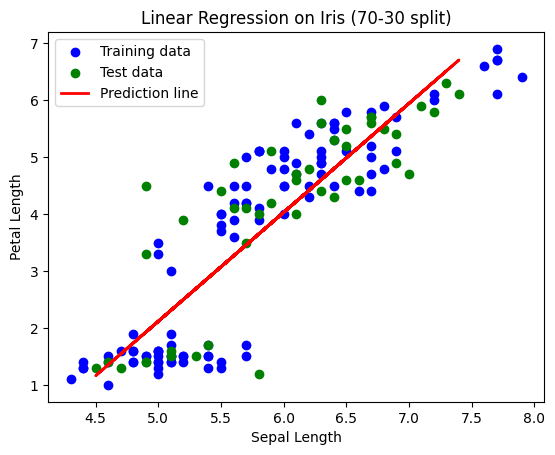

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="green", label="Test data")
plt.plot(X_test, y_test_pred, "r-", linewidth=2, label="Prediction line")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Linear Regression on Iris (70-30 split)")
plt.legend()
plt.show()